### Week-2    Exer-1

## Metadata: 
The bodyfat dataset lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

Atttributes: 
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import mean_squared_error
import math
print("Libraries are successfully imported!!")

Libraries are successfully imported!!


In [2]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


### Import the dataset

In [3]:
df = pd.read_csv("bodyfat.csv")
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

### 1. Perform experiments using (70,15,15) split and tabulate the performance in terms of RMSE for the following Hyper parameters.
(a)
Model 1 - 1  Hidden layer, 128 units

Model 2 - 2 Hidden layers, (128,64) units

Model 3 - 3 Hidden layers, (128,64,32) units 

(b) Epochs (10,20,30,40)

(c) Activation function (Sigmoid /RELU)

(d) Without Regularization, with Regularization (L1/L2)

(e) Learning rate (1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001)

In [6]:
X = df.drop(columns="BodyFat", axis =0)
y = df['BodyFat']

Making a (70,15,15) split on the given data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y,train_size = 0.7, random_state = 42)
X_test,X_valid,y_test,y_valid = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42)

In [8]:
print("Training data: ",X_train.shape)
print("Valid data: ",X_valid.shape)
print("Test data: ",X_test.shape)

Training data:  (176, 14)
Valid data:  (38, 14)
Test data:  (38, 14)


## **Building model with 1 hidden layer**

###  Define the Model (using Sequential API)


1 Hidden layer without Regularization

In [9]:
M1= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model1.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 outputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [10]:
for l in [1,0.3,0.1,0.01,0.03,0.001,0.0001,0.00001]:
  opt = tf.keras.optimizers.Adam(learning_rate=l) #if learning rate is not specified, it takes the default value = 0.001

  model1.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
  batch_size = 32
  for epoch_size in [10,20,30,40]:
    
    #to fit the model
    history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epoch_size, validation_data=(X_valid,y_valid))
    model1.evaluate(X_test, y_test)

    y_pred1 = model1.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred1))
    if(rmse < 20):
      M1["Learning_Rate"].append(l)
      M1["Epochs"].append(epoch_size)
      M1["RMSE"].append(rmse)

Epoch 1/10
6/6 [==============================] - 1s 82ms/step - loss: 563.5504 - root_mean_squared_error: 23.7392 - val_loss: 375.1592 - val_root_mean_squared_error: 19.3690
Epoch 2/10
6/6 [==============================] - 0s 17ms/step - loss: 459.9890 - root_mean_squared_error: 21.4474 - val_loss: 375.1592 - val_root_mean_squared_error: 19.3690
Epoch 3/10
6/6 [==============================] - 0s 22ms/step - loss: 459.9890 - root_mean_squared_error: 21.4474 - val_loss: 375.1592 - val_root_mean_squared_error: 19.3690
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 459.9890 - root_mean_squared_error: 21.4474 - val_loss: 375.1592 - val_root_mean_squared_error: 19.3690
Epoch 5/10
6/6 [==============================] - 0s 17ms/step - loss: 459.9890 - root_mean_squared_error: 21.4474 - val_loss: 375.1592 - val_root_mean_squared_error: 19.3690
Epoch 6/10
6/6 [==============================] - 0s 16ms/step - loss: 459.9890 - root_mean_squared_error: 21.4474 - val_loss

In [11]:
M1 = pd.DataFrame(M1)
M1

,Learning_Rate,Epochs,RMSE
0,1.00000,10,19.726158
1,1.00000,20,19.726158
2,1.00000,30,19.726158
3,1.00000,40,19.726158
4,0.30000,10,19.726158
5,0.30000,20,19.726158
6,0.30000,30,19.726158
7,0.30000,40,19.726158
8,0.10000,10,19.726158
9,0.10000,20,19.726158


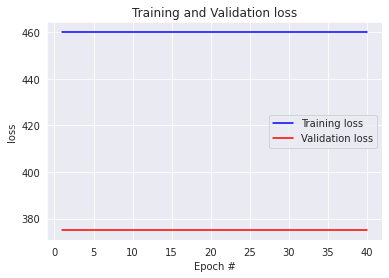

In [12]:
# plotting the training and validation loss
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

defining a user-defined function to compute 

In [13]:
def build(model, M):
  for l in [1,0.3,0.1,0.01,0.03,0.001,0.0001,0.00001]:
    opt = tf.keras.optimizers.Adam(learning_rate=l) #if learning rate is not specified, it takes the default value = 0.001

    model.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    batch_size = 32
    for epoch_size in [10,20,30,40]:
      
      #to fit the model
      history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch_size, validation_data=(X_valid,y_valid))
      model.evaluate(X_test, y_test)

      y_pred = model.predict(X_test)
      rmse = math.sqrt(mean_squared_error(y_test, y_pred))
      if(rmse < 20):
        M["Learning_Rate"].append(l)
        M["Epochs"].append(epoch_size)
        M["RMSE"].append(rmse)

user-defined function for plotting

1 Hidden layer with L1 Regularizer

In [14]:
M2= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model2.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(), name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))
model2.summary()

build(model2, M2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 outputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 1s 36ms/step - loss: 242979840.0000 - root_mean_squared_error: 15587.8105 - val_loss: 416.3965 - val_root_mean_squared_error: 19.3690
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 510.8694 - root_mean_squared_error: 21.4474 - val_loss: 438.41

In [15]:
M2 = pd.DataFrame(M2)
M2

,Learning_Rate,Epochs,RMSE
0,1.00000,10,19.726158
1,1.00000,20,19.726158
2,1.00000,30,19.726158
3,1.00000,40,19.726158
4,0.30000,10,19.726158
5,0.30000,20,19.726158
6,0.30000,30,19.726158
7,0.30000,40,19.726158
8,0.10000,10,19.726158
9,0.10000,20,19.726158


1 Hidden layer with L2 Regularizer

In [16]:
M3= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model3.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))
model3.summary()

build(model3, M3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 outputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 1s 38ms/step - loss: 465.3272 - root_mean_squared_error: 21.4474 - val_loss: 376.2100 - val_root_mean_squared_error: 19.3690
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 462.0713 - root_mean_squared_error: 21.4474 - val_loss: 375.2868 - val_

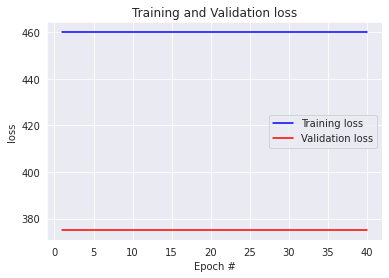

In [17]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [18]:
M3 = pd.DataFrame(M3)
M3

,Learning_Rate,Epochs,RMSE
0,1.00000,10,19.726158
1,1.00000,20,19.726158
2,1.00000,30,19.726158
3,1.00000,40,19.726158
4,0.30000,10,19.726158
5,0.30000,20,19.726158
6,0.30000,30,19.726158
7,0.30000,40,19.726158
8,0.10000,10,19.726158
9,0.10000,20,19.726158


2 Hidden Layers without Regularizatiion

In [19]:
M4= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model4.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model4.add(tf.keras.layers.Dense(164, activation="relu", name="HiddenLayer2"))
model4.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))

model4.summary()

build(model4, M4)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 164)               21156     
                                                                 
 outputLayer (Dense)         (None, 1)                 165       
                                                                 
Total params: 23,241
Trainable params: 23,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 1s 39ms/step - loss: 395963039744.0000 - root_mean_squared_error: 629255.9375 - val_loss: 375.1592 - val_root_mean_squared_error: 19

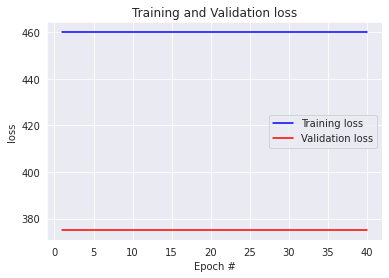

In [20]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [21]:
M4 = pd.DataFrame(M4)
M4

,Learning_Rate,Epochs,RMSE
0,1.00000,10,19.726158
1,1.00000,20,19.726158
2,1.00000,30,19.726158
3,1.00000,40,19.726158
4,0.30000,10,19.726158
5,0.30000,20,19.726158
6,0.30000,30,19.726158
7,0.30000,40,19.726158
8,0.10000,10,19.726158
9,0.10000,20,19.726158


2 Hidden layer with L1 Regularizer

In [22]:
M5= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model5.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(), name="HiddenLayer1"))
model5.add(tf.keras.layers.Dense(164, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer2"))
model5.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))

model5.summary()

build(model5, M5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 164)               21156     
                                                                 
 outputLayer (Dense)         (None, 1)                 165       
                                                                 
Total params: 23,241
Trainable params: 23,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 1s 38ms/step - loss: 651.5869 - root_mean_squared_error: 19.7315 - val_loss: 968.7775 - val_root_mean_squared_error: 19.3690
Epoch 2

KeyboardInterrupt: ignored

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
M5 = pd.DataFrame(M5)
M5

2 Hidden layer with L2 Regularizer

In [ ]:
M6= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model6 = tf.keras.Sequential()

model6.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model6.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer1"))
model6.add(tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer2"))
model6.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))

model6.summary()

build(model6, M6)

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
M6 = pd.DataFrame(M6)
M6

3 Hidden layer without Regularization

In [ ]:
M7= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model7 = tf.keras.Sequential()

model7.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model7.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model7.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
model7.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3"))
model7.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))

model7.summary()

build(model5, M7)

In [ ]:
M7 = pd.DataFrame(M7)
M7

3 Hidden layer with L1 Regularizer

In [ ]:
M8= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model8 = tf.keras.Sequential()

model8.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model8.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(), name="HiddenLayer1"))
model8.add(tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(), name="HiddenLayer2"))
model8.add(tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(), name="HiddenLayer3"))
model8.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))


model8.summary()

build(model8, M8)

In [ ]:

M8 = pd.DataFrame(M8)
M8

3 Hidden layer with L2 Regularizer

In [ ]:
M9= {"Learning_Rate":[],"Epochs":[],"RMSE":[]}
model9 = tf.keras.Sequential()

model9.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer")) 
model9.add(tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer1"))
model9.add(tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer2"))
model9.add(tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(), name="HiddenLayer3"))
model9.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))


model9.summary()

build(model9, M9)

In [ ]:
M9 = pd.DataFrame(M9)
M9